In [300]:
import numpy as np
import pandas as pd

In [301]:
df = pd.read_csv('spam.csv')

In [302]:
df.sample(10)

,Category,Message
4613,ham,Sorry da. I gone mad so many pending works wha...
1087,ham,I don't think he has spatula hands!
3939,ham,WHEN THE FIRST STRIKE IS A RED ONE. THE BIRD +...
1148,ham,Ok... Help me ask if she's working tmr a not?
2256,ham,"I just lov this line: ""Hurt me with the truth,..."
122,ham,here is my new address -apples&pairs&all that ...
2803,ham,And smile for me right now as you go and the w...
5563,ham,Ard 6 like dat lor.
1304,ham,I cant pick the phone right now. Pls send a me...
1484,ham,Purity of friendship between two is not about ...


In [303]:
df.shape

(5572, 2)

# Data Cleaning

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [305]:
#  All dataset is correct, so no need to clean 

In [306]:
df.rename(columns= {'Category':'target','Message':'text'},inplace= True)

In [307]:
df.sample(5)

,target,text
4017,ham,In which place i can get rooms cheap:-)
2371,ham,"That day ü say ü cut ur hair at paragon, is it..."
5321,ham,Ok no problem... Yup i'm going to sch at 4 if ...
2822,ham,Oh god..taken the teeth?is it paining
5193,ham,"It's wylie, you in tampa or sarasota?"


In [308]:
# Converting target to binary form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target']=le.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [309]:
# Checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [310]:
# Checking for duplicate values
df.duplicated().sum()

415

In [311]:
# Remove duplicates
df= df.drop_duplicates(keep='first')
# checking again duplicate values
df.duplicated().sum()

0

# Exploratory data analysis


In [312]:
# count number of spam and ham
df['target'].value_counts()  # 4516 ham and 641 spam

target
0    4516
1     641
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x17765c0d0>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57'),
  Text(0.5548334056198901, -0.22838540235364085, '12.43')])

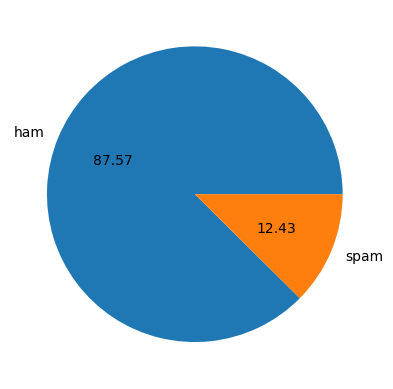

In [313]:
#plotting this
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [314]:
# Data is imbalanced (more ham data and less spam data)

In [315]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [316]:
import nltk  # natural language toolkit

In [317]:
nltk.download('punkt') # downloading some dependencies

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rajeshkumarjena/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [318]:
df['num_characters'] = df['text'].apply(len)   # counting the number of characters each text contains and storing them in a column
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [319]:
df['text'].head(5).apply(lambda x : nltk.word_tokenize(x))     # this stores all the words in a list

0    [Go, until, jurong, point, ,, crazy, .., Avail...
1             [Ok, lar, ..., Joking, wif, u, oni, ...]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, ..., U, c, alrea...
4    [Nah, I, do, n't, think, he, goes, to, usf, ,,...
Name: text, dtype: object

In [320]:
df['num_words']= df['text'].apply(lambda x : len(nltk.word_tokenize(x)))   # storing it in another column

In [321]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [322]:
df['text'].head(5).apply(lambda x : nltk.sent_tokenize(x))     # this stores all the sentences in a list

0    [Go until jurong point, crazy.., Available onl...
1                     [Ok lar..., Joking wif u oni...]
2    [Free entry in 2 a wkly comp to win FA Cup fin...
3    [U dun say so early hor... U c already then sa...
4    [Nah I don't think he goes to usf, he lives ar...
Name: text, dtype: object

In [323]:
df['num_sentences']= df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [324]:
# Analyzing
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [325]:
# Describing ham and spam messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe() # for ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [326]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()  # for spam

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [327]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

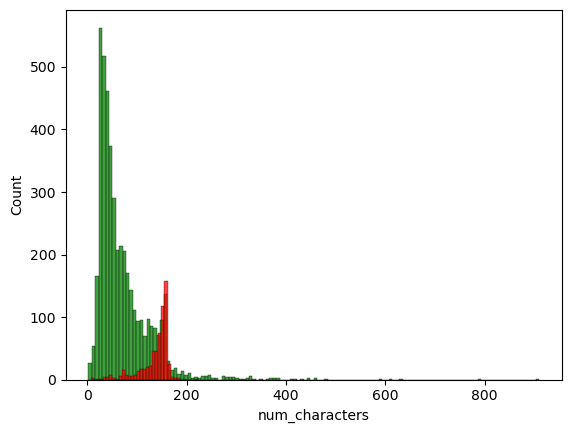

In [328]:
# plotting histogram of no. of characters for both
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='red')
# spam characters are less

<Axes: xlabel='num_words', ylabel='Count'>

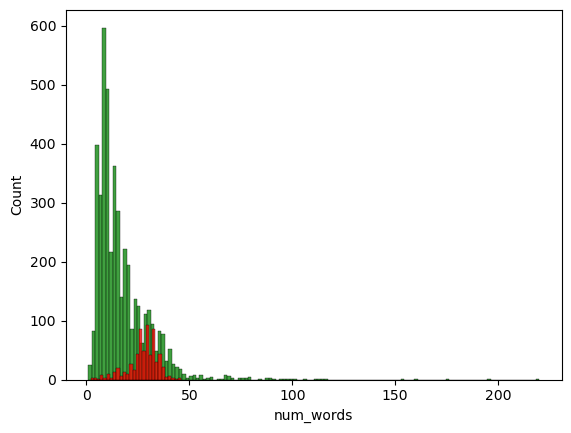

In [329]:
# plotting histogram of no. of words for both
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='red')
# spam words are less

/Users/rajeshkumarjena/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


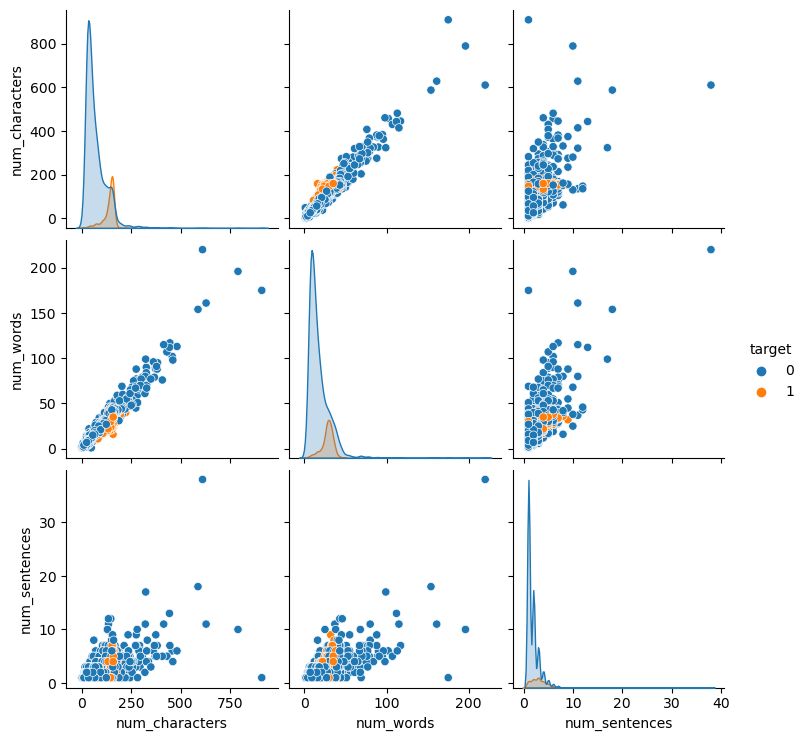

In [330]:
# all relations
sns.pairplot(df, hue='target')

<Axes: >

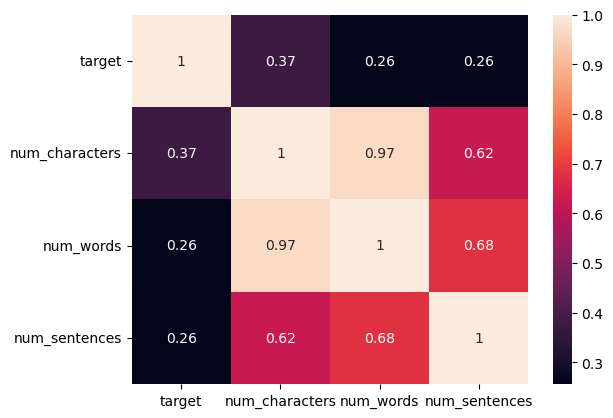

In [331]:
import seaborn as sns
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)


# Data PreProcessing 

# Lowercase conversion (all data in lower case letter) 
# Tokenize (splitting datas into words)
# Removing Special Characters 
# Removing stop words and punctuation Stemming

In [332]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() # object creation for stemming

# Download stopwords if not already downloaded
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()  # Convert to lower case
    text = word_tokenize(text)  # Tokenize the text
    y = []
    for i in text:
        if i.isalnum():  # Check if the word is alphanumeric
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  # clearing punctuation and stopwords
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

transform_text('I am a %% boy')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajeshkumarjena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'boy'

In [333]:
transform_text('I am a %% boy , I am presenting ML') # removed special characteer

'boy present ml'

In [334]:
transform_text(df['text'][0]) # message of the 1st column

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [335]:
df['text'].apply(transform_text).head() #applying on the text

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: text, dtype: object

In [336]:
# creating a new column in df
df['transformed_text']=df['text'].apply(transform_text)

In [337]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [338]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [339]:
# The most repetitive words
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size= 10,background_color='white')

In [340]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" ")) # for spam messages

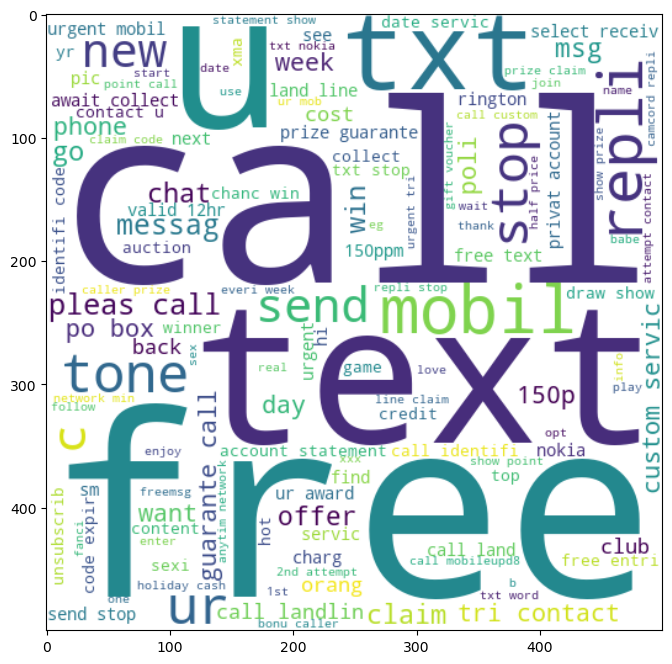

In [341]:
plt.figure(figsize=(15, 8))
plt.imshow(spam_wc, interpolation='bilinear')

In [342]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" ")) # for ham messages

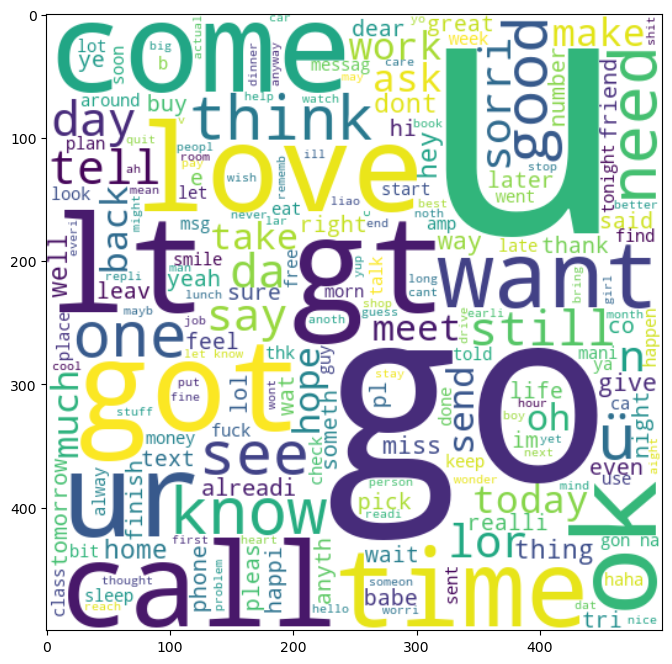

In [343]:
plt.figure(figsize=(15, 8))
plt.imshow(ham_wc, interpolation='bilinear')

In [344]:
df[df['target']==1]['transformed_text'].head()
# making it a list
#df[df['target']==1]['transformed_text'].tolist() and Now all the words are stored

2     free entri 2 wkli comp win fa cup final tkt 21...
5     freemsg hey darl 3 week word back like fun sti...
8     winner valu network custom select receivea pri...
9     mobil 11 month u r entitl updat latest colour ...
11    six chanc win cash 100 pound txt csh11 send co...
Name: transformed_text, dtype: object

In [345]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [346]:
len(spam_corpus)  #total apam words

9781

In [347]:
from collections import Counter
# Counter(spam_corpus) it gives all the word and their frequencies
Counter(spam_corpus).most_common(30)  # 30 most common spam words

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 53),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 48),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

In [348]:
common_words = Counter(spam_corpus).most_common(30)

In [349]:
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

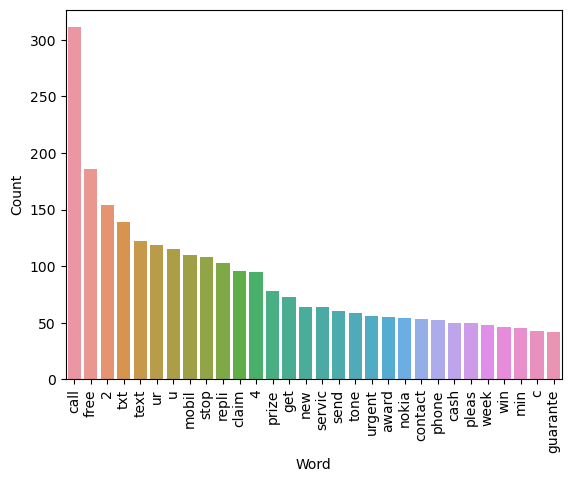

In [350]:
sns.barplot(data=df_common_words, x='Word', y='Count')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

In [351]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus) 

35940

In [352]:
Counter(ham_corpus).most_common(30)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 218),
 ('good', 215),
 ('want', 209),
 ('ur', 203),
 ('day', 195),
 ('ü', 173),
 ('need', 171),
 ('one', 166),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('think', 150),
 ('see', 148),
 ('take', 144),
 ('still', 144),
 ('da', 142),
 ('tell', 133)]

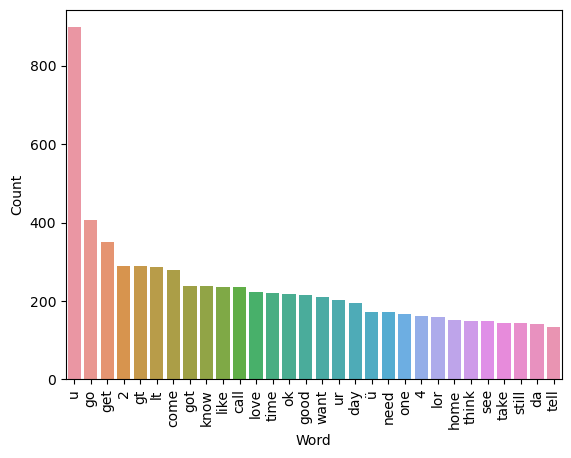

In [353]:
common_words = Counter(ham_corpus).most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
sns.barplot(data=df_common_words, x='Word', y='Count')
plt.xticks(rotation='vertical') 
plt.show()

# Model Building

In [354]:
# dataset contains textual or categorical features,
#you may need to convert them into a numerical format suitable for input into the Naive Bayes classifier.
#This could involve techniques like one-hot encoding or TF-IDF vectorization for text data.

In [355]:
# First using countVector
# CountVectorizer is a technique used for converting text documents into numerical feature vectors.

In [356]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() #. creating object

In [357]:
X = cv.fit_transform(df['transformed_text']).toarray()
# print X
X.shape   # 5157 words and 6781 words

(5157, 6781)

In [358]:
y= df['target'].values

In [359]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [360]:
# spliting data into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) # 20 % for test

In [361]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB # importing all the naive bayes algorithm

In [362]:
# creating object 
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [363]:
# training model using gaussian naive bayes algorithm
gnb.fit(X_train,y_train)       # fitting model
y_pred1 = gnb.predict(X_test)  # predict on test data
print(accuracy_score(y_test,y_pred1)) # printing accuracy score
print(confusion_matrix(y_test,y_pred1))  # printing confusion matrix
print(precision_score(y_test,y_pred1))   # printing precision score

0.8691860465116279
[[786 119]
 [ 16 111]]
0.4826086956521739


In [364]:
# training model using Multinomial Naive Bayes algorithm
mnb.fit(X_train,y_train)       # fitting model
y_pred2 = mnb.predict(X_test)  # predict on test data
print(accuracy_score(y_test,y_pred2)) # printing accuracy score
print(confusion_matrix(y_test,y_pred2))  # printing confusion matrix
print(precision_score(y_test,y_pred2))   # printing precision score

0.9796511627906976
[[895  10]
 [ 11 116]]
0.9206349206349206


In [365]:
# training model using  Bernoulli Naive Bayes algorithm
bnb.fit(X_train,y_train)       # fitting model
y_pred3 = bnb.predict(X_test)  # predict on test data
print(accuracy_score(y_test,y_pred3)) # printing accuracy score
print(confusion_matrix(y_test,y_pred3))  # printing confusion matrix
print(precision_score(y_test,y_pred3))   # printing precision score

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


In [366]:
# Rathe than using countVectorization we can use TFDIF
#TF-IDF stands for Term Frequency-Inverse Document Frequency.
#It is a numerical statistic used in natural language processing and information retrieval to evaluate the importance of a word in a document relative to a collection of documents. 

In [367]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000) # creating object
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5157, 3000)

In [368]:
y = df['target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [369]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [370]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672480620155039
[[785 120]
 [ 17 110]]
0.4782608695652174


In [371]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)) 
# Nice precission score (gives 0 false +ve) and accuracy but precission score matters more in this case beacause data is immbalanced

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [372]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [373]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [375]:
# Object Creation
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [376]:
# Creating a dictionary adding algorithm name and obj
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [377]:
# Creating a function which will calculate all the accuracy and precision score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [378]:
# Calculating for svc 
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9757751937984496, 0.9811320754716981)

In [379]:
# Running the loop on the dictionary
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy - 0.9757751937984496
Precision - 0.9811320754716981
For KN
Accuracy - 0.9127906976744186
Precision - 1.0
For NB
Accuracy - 0.9709302325581395
Precision - 1.0
For DT
Accuracy - 0.936046511627907
Precision - 0.8210526315789474
For LR
Accuracy - 0.9583333333333334
Precision - 0.9375
For RF
Accuracy - 0.9728682170542635
Precision - 1.0
For AdaBoost
Accuracy - 0.9660852713178295
Precision - 0.9423076923076923
For BgC
Accuracy - 0.9612403100775194
Precision - 0.8918918918918919
For ETC
Accuracy - 0.9777131782945736
Precision - 0.9905660377358491
For GBDT
Accuracy - 0.9554263565891473
Precision - 0.9764705882352941
For xgb
Accuracy - 0.9728682170542635
Precision - 0.9714285714285714


In [380]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [382]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.970930,1.000000
5,RF,0.972868,1.000000
8,ETC,0.977713,0.990566
0,SVC,0.975775,0.981132
9,GBDT,0.955426,0.976471
10,xgb,0.972868,0.971429
6,AdaBoost,0.966085,0.942308
4,LR,0.958333,0.937500
7,BgC,0.961240,0.891892


/Users/rajeshkumarjena/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


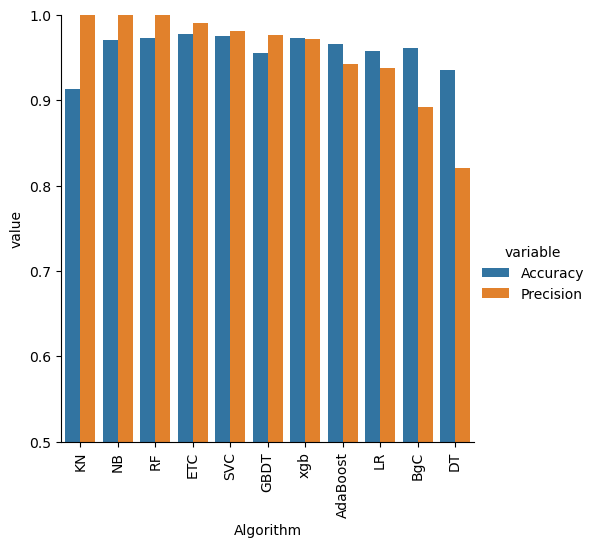

In [384]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# MODEL IMPROVEMENT

In [385]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000
1,NB,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000
2,RF,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000
3,ETC,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566
4,SVC,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132
5,GBDT,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471
6,xgb,0.972868,0.971429,0.972868,0.971429,0.972868,0.971429,0.972868,0.971429
7,AdaBoost,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308
8,LR,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500
9,BgC,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892


In [388]:
# Voting Classifier
# The Voting Classifier is a simple ensemble method that combines the predictions of multiple individual classifiers to make a final prediction.
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [389]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 1.0


In [390]:
# Naive bayes is the best one after experimenting all
# How will be the process ?
# 1- Accept a String of text
# 2- Pre process the string make it in words
# 3- vectorize
# 4- put on training model
# 5- SHOW OUTPUT

In [391]:
# MAKING PICKLE FILE
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))